Pacotes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8) # define o tamanho padrão dos gráficos criados

Importação

In [2]:
path = 'D:/UFPR/2º Semestre 2021/Estatística Econômica e Introdução à Econometria/1. Relatório Enade/2018/3.DADOS/microdados_enade_2018.txt' # caminho do arquivo
base = pd.read_table(path, sep=';', decimal=',') # importa arquivo

In [64]:
base_idse = base.filter([
    'CO_IES',
    'CO_CATEGAD',           # Categoria Universidade
    'CO_GRUPO',             # Categoria do curso
    'CO_UF_CURSO',          # Estado do curso
    'CO_MUNIC_CURSO',       # Cidade do curso
    'QE_I08',               # Renda total da família
    'QE_I09',               # situação financeira
    'QE_I04',               # Escolaridade do pai
    'QE_I05',               # Escolaridade da mãe
    'QE_I17',               # Onde cursou ensino médio
    'NT_GER'
]).dropna()

## Tratamento

Nome do curso

In [220]:
dict_curso = {
1:"ADMINISTRAÇÃO",
2:"DIREITO",
13:"CIÊNCIAS ECONÔMICAS",
18:"PSICOLOGIA",
22:"CIÊNCIAS CONTÁBEIS",
26:"DESIGN",
29:"TURISMO",
38:"SERVIÇO SOCIAL",
67:"SECRETARIADO EXECUTIVO",
81:"RELAÇÕES INTERNACIONAIS",
83:"TECNOLOGIA EM DESIGN DE MODA",
84:"TECNOLOGIA EM MARKETING",
85:"TECNOLOGIA EM PROCESSOS GERENCIAIS",
86:"TECNOLOGIA EM GESTÃO DE RECURSOS HUMANOS",
87:"TECNOLOGIA EM GESTÃO FINANCEIRA",
88:"TECNOLOGIA EM GASTRONOMIA",
93:"TECNOLOGIA EM GESTÃO COMERCIAL",
94:"TECNOLOGIA EM LOGÍSTICA",
100:"ADMINISTRAÇÃO PÚBLICA",
101:"TEOLOGIA",
102:"TECNOLOGIA EM COMÉRCIO EXTERIOR",
103:"TECNOLOGIA EM DESIGN DE INTERIORES",
104:"TECNOLOGIA EM DESIGN GRÁFICO",
105:"TECNOLOGIA EM GESTÃO DA QUALIDADE",
106:"TECNOLOGIA EM GESTÃO PÚBLICA",
803:"COMUNICAÇÃO SOCIAL - JORNALISMO",
804:"COMUNICAÇÃO SOCIAL - PUBLICIDADE E PROPAGANDA"
}

In [221]:
base_idse['CO_GRUPO'] = [dict_curso[resp] for resp in base_idse.CO_GRUPO] #substitui os valores pelo nome da regiao

Categoria das Universidades

In [222]:
categoria_ies = pd.read_excel('categoria-ies.xlsx')

In [223]:
dict_categad = {} #Transforma o df das regioes em dicionario
for i in range(0,len(categoria_ies)):
    dict_categad[categoria_ies['Cod'][i]] = categoria_ies['Categoria'][i]

In [224]:
base_idse['CO_CATEGAD'] = [dict_categad[resp] for resp in base_idse.CO_CATEGAD] #substitui os valores pelo nome da regiao

Estado do curso

In [225]:
ufs = pd.read_excel('codigo-ufs.xlsx')

In [226]:
dict_ufs = {} #Transforma o df das regioes em dicionario
for i in range(0,len(ufs)):
    dict_ufs[ufs['Cod'][i]] = ufs['Nome'][i]

In [227]:
base_idse['CO_UF_CURSO'] = [dict_ufs[resp] for resp in base_idse.CO_UF_CURSO] #substitui os valores pelo nome da regiao

Municipio do curso

In [228]:
municipios = pd.read_excel('codigos-municipios.xlsx')

In [229]:
dict_mun = {} #Transforma o df das regioes em dicionario
for i in range(0,len(municipios)):
    dict_mun[municipios['Cod'][i]] = municipios['Municipio'][i]

In [230]:
base_idse['CO_MUNIC_CURSO'] = [dict_mun[resp] for resp in base_idse.CO_MUNIC_CURSO] #substitui os valores pelo nome da regiao

Pais (Peso no índice)

In [231]:
dict_escolaridade_pais = {
"A":0,
"B":0.10,
"C":0.25,
"D":0.60,
"E":0.85,
"F":1
}

In [232]:
base_idse['QE_I04'] = [dict_escolaridade_pais[resp] for resp in base_idse.QE_I04] # substitui categoria de educação pelo seu peso

In [233]:
base_idse['QE_I05'] = [dict_escolaridade_pais[resp] for resp in base_idse.QE_I05] # substitui categoria de educação pelo seu peso

Renda


In [234]:
dict_renda = {
"A":0,
"B":0.26,
"C":0.45,
"D":0.61,
"E":0.76,
"F":0.89,
"G":1
}

In [235]:
base_idse['QE_I08'] = [dict_renda[resp] for resp in base_idse.QE_I08] #substitui a categoria da renda pelo peso

Tipo de Ensino Médio

In [236]:
dict_em = {
"A":0,
"B":0.80,
"C":0.60,
"D":0.20,
"E":0.40,
"F":1
}

In [237]:
base_idse['QE_I17'] = [dict_em[resp] for resp in base_idse.QE_I17] #substitui os valores pelo peso

Coluna Índice


In [238]:
base_idse['IDSE'] = (base_idse['QE_I08'] * 0.5 + base_idse['QE_I04'] * 0.10 + base_idse['QE_I05'] * 0.10 + base_idse['QE_I17'] * 0.30) / 1

Text(0.5, 1.0, 'Distribuição do Índice de Desenvolvimento Socioeconômico Educacional')

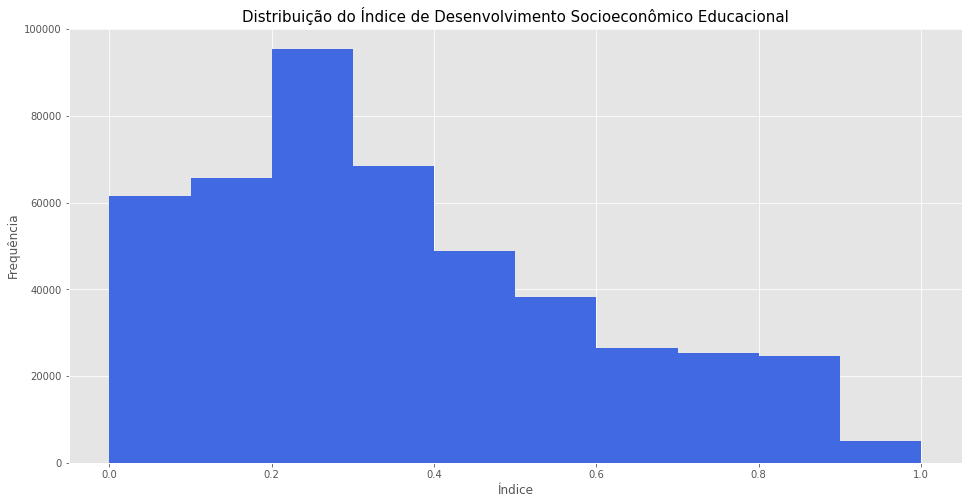

In [186]:
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.hist(base_idse['IDSE'], color='royalblue')
plt.xlabel('Índice')
plt.ylabel('Frequência')
plt.title('Distribuição do Índice de Desenvolvimento Socioeconômico Educacional', fontsize=15)

## Análise

'CO_CATEGAD',           # Categoria Universidade

'CO_GRUPO',             # Categoria do curso

'CO_UF_CURSO',          # Estado do curso

'CO_MUNIC_CURSO',       # Cidade do curso

'QE_I08',               # Renda total da família

'QE_I04',               # Escolaridade do pai

'QE_I05',               # Escolaridade da mãe

'QE_I17',               # Onde cursou ensino médio

'NT_GER'                # Nota Geral


In [168]:
comparativo = base.filter(['CO_UF_CURSO', 'QE_I08', 'NT_GER']).dropna()

In [65]:
qe_i08respostas = {
    "A" : "Até 1,5 salário mínimo (até R$ 1.431,00)",
    "B" : "De 1,5 a 3 salários mínimos (R$ 1.431,01 a R$ 2.862,00)",
    "C" : "De 3 a 4,5 salários mínimos (R$ 2.862,01 a R$ 4.293,00)",
    "D" : "De 4,5 a 6 salários mínimos (R$ 4.293,01 a R$ 5.724,00)",
    "E" : "De 6 a 10 salários mínimos (R$ 5.724,01 a R$ 9.540,00)",
    "F" : "De 10 a 30 salários mínimos (R$ 9.540,01 a R$ 28.620,00)",
    "G" : "Acima de 30 salários mínimos (mais de R$ 28.620,00)"
}

In [66]:
base_idse['QE_I08'] = [qe_i08respostas[resp] for resp in base_idse.QE_I08] #substitui as letras pelas respostas

In [68]:
qe_i09respostas = {
"A" : "Não tenho renda e meus gastos são financiados por programas governamentais.",
"B" : "Não tenho renda e meus gastos são financiados pela minha família ou por outras pessoas.",
"C" : "Tenho renda, mas recebo ajuda da família ou de outras pessoas para financiar meus gastos.",
"D" : "Tenho renda e não preciso de ajuda para financiar meus gastos.",
"E" : "Tenho renda e contribuo com o sustento da família.",
"F" : "Sou o principal responsável pelo sustento da família."
}

In [69]:
base_idse['QE_I09'] = [qe_i09respostas[resp] for resp in base_idse.QE_I09] #substitui as letras pelas respostas

---

Panorama geral do índice em comparação com outras variáveis

In [203]:
tabela_renda = comparativo.groupby('QE_I08').count() #classe modal
tabela_renda.rename(columns={'QE_I08':'Renda'}, inplace=True)
tabela_renda

,CO_UF_CURSO,NT_GER
QE_I08,,
"Acima de 30 salários mínimos (mais de R$ 28.620,00)",7643,7643
"Até 1,5 salário mínimo (até R$ 1.431,00)",88830,88830
"De 1,5 a 3 salários mínimos (R$ 1.431,01 a R$ 2.862,00)",126809,126809
"De 10 a 30 salários mínimos (R$ 9.540,01 a R$ 28.620,00)",33062,33062
"De 3 a 4,5 salários mínimos (R$ 2.862,01 a R$ 4.293,00)",99817,99817
"De 4,5 a 6 salários mínimos (R$ 4.293,01 a R$ 5.724,00)",51564,51564
"De 6 a 10 salários mínimos (R$ 5.724,01 a R$ 9.540,00)",51973,51973


In [183]:
base_idse['IDSE'].mean() #Média geral do IDSE


0.35544189881182864

In [181]:
base_idse.groupby('QE_I08')['QE_I08'].count()

QE_I08
0.00     88830
0.26    126809
0.45     99817
0.61     51564
0.76     51973
0.89     33062
1.00      7643
Name: QE_I08, dtype: int64

In [182]:
base_idse.groupby('QE_I17')['QE_I17'].count()

QE_I17
0.0    308368
0.2     22581
0.4     18166
0.6       469
0.8    108793
1.0      1321
Name: QE_I17, dtype: int64

In [210]:
base_idse.where(base_idse.CO_GRUPO == 'CIÊNCIAS ECONÔMICAS')['IDSE'].mean() # média de curso 

0.4687867647058823

In [ ]:
base_idse.where(base_idse.CO_GRUPO == 'CIÊNCIAS ECONÔMICAS')['IDSE'].mean() # média de curso 

In [259]:
base_idse.groupby('CO_CATEGAD')['IDSE'].mean()

CO_CATEGAD
Fundação Pública de Direito Privado Municipal                                                 0.403926
Pessoa Jurídica de Direito Privado - Com fins lucrativos - Sociedade Civil                    0.322587
Pessoa Jurídica de Direito Privado - Com fins lucrativos - Sociedade Mercantil ou Comercia    0.300414
Pessoa Jurídica de Direito Privado - Sem fins lucrativos - Associação de Utilidade Pública    0.399872
Pessoa Jurídica de Direito Privado - Sem fins lucrativos - Fundação                           0.394674
Pessoa Jurídica de Direito Privado - Sem fins lucrativos - Sociedade                          0.374794
Pessoa Jurídica de Direito Público - Estadual                                                 0.370148
Pessoa Jurídica de Direito Público - Federal                                                  0.426759
Pessoa Jurídica de Direito Público - Municipal                                                0.393578
Privada com fins lucrativos                                   

In [240]:
base_idse.groupby('CO_UF_CURSO')['IDSE'].mean()

CO_UF_CURSO
Acre                    0.335077
Alagoas                 0.384481
Amapa                   0.320475
Amazonas                0.329051
Bahia                   0.303653
Ceará                   0.344095
Distrito federal        0.429666
Espírito Santo          0.370092
Goiás                   0.336266
Maranhão                0.318637
Mato Grosso             0.312485
Mato Grosso do Sul      0.324477
Minas gerais            0.346635
Paraná                  0.322921
Paraíba                 0.340284
Pará                    0.366334
Pernambuco              0.365194
Piauí                   0.339970
Rio Grande do Norte     0.344901
Rio Grande do Sul       0.374400
Rio de Janeiro          0.404741
Rondônia                0.322216
Roraima                 0.313366
Santa Catarina          0.357005
Sergipe                 0.363257
São Paulo               0.364390
Tocantins               0.310573
Name: IDSE, dtype: float64

In [241]:
base_idse.where(base_idse.CO_IES==571)['IDSE'].mean() # IDSE médio para o curso o estado do paraná

0.521407867494824

In [243]:
base_idse.where((base_idse.CO_IES==571) & (base_idse.CO_GRUPO=='CIÊNCIAS ECONÔMICAS'))['IDSE'].mean() # IDSE médio para o curso o estado do paraná

0.389742268041237

In [255]:
base_idse.where(base_idse.CO_IES==571).groupby('CO_GRUPO')['IDSE'].mean().sort_values() # IDSE médio para o curso o estado do paraná

CO_GRUPO
SERVIÇO SOCIAL                                   0.223587
ADMINISTRAÇÃO PÚBLICA                            0.258696
TECNOLOGIA EM GESTÃO PÚBLICA                     0.303462
CIÊNCIAS ECONÔMICAS                              0.389742
TECNOLOGIA EM GESTÃO DA QUALIDADE                0.397250
TURISMO                                          0.406471
CIÊNCIAS CONTÁBEIS                               0.466915
DESIGN                                           0.525078
PSICOLOGIA                                       0.559932
ADMINISTRAÇÃO                                    0.580995
COMUNICAÇÃO SOCIAL - PUBLICIDADE E PROPAGANDA    0.587000
COMUNICAÇÃO SOCIAL - JORNALISMO                  0.600517
DIREITO                                          0.639425
Name: IDSE, dtype: float64

In [70]:
ordem8 = [
"Até 1,5 salário mínimo (até R$ 1.431,00)",
"De 1,5 a 3 salários mínimos (R$ 1.431,01 a R$ 2.862,00)",
"De 3 a 4,5 salários mínimos (R$ 2.862,01 a R$ 4.293,00)",
"De 4,5 a 6 salários mínimos (R$ 4.293,01 a R$ 5.724,00)",
"De 6 a 10 salários mínimos (R$ 5.724,01 a R$ 9.540,00)",
"De 10 a 30 salários mínimos (R$ 9.540,01 a R$ 28.620,00)",
"Acima de 30 salários mínimos (mais de R$ 28.620,00)"
]

In [71]:
ordem9 = [
"Não tenho renda e meus gastos são financiados por programas governamentais.",
"Não tenho renda e meus gastos são financiados pela minha família ou por outras pessoas.",
"Tenho renda, mas recebo ajuda da família ou de outras pessoas para financiar meus gastos.",
"Tenho renda e não preciso de ajuda para financiar meus gastos.",
"Tenho renda e contribuo com o sustento da família.",
"Sou o principal responsável pelo sustento da família."
]

In [72]:
base_idse.head()

,CO_IES,CO_CATEGAD,CO_GRUPO,CO_UF_CURSO,CO_MUNIC_CURSO,QE_I08,QE_I09,QE_I04,QE_I05,QE_I17,NT_GER
0,1356,10003,1,35,3546603,"De 3 a 4,5 salários mínimos (R$ 2.862,01 a R$ ...",Não tenho renda e meus gastos são financiados ...,D,D,A,42.8
1,1356,10003,1,35,3546603,"De 4,5 a 6 salários mínimos (R$ 4.293,01 a R$ ...",Tenho renda e contribuo com o sustento da famí...,B,B,A,59.3
2,1356,10003,1,35,3546603,"De 6 a 10 salários mínimos (R$ 5.724,01 a R$ 9...",Tenho renda e não preciso de ajuda para financ...,D,D,A,60.9
3,1356,10003,1,35,3546603,"De 4,5 a 6 salários mínimos (R$ 4.293,01 a R$ ...",Tenho renda e não preciso de ajuda para financ...,D,D,A,25.0
4,1356,10003,1,35,3546603,"De 6 a 10 salários mínimos (R$ 5.724,01 a R$ 9...",Tenho renda e não preciso de ajuda para financ...,C,C,A,42.4


In [73]:
relacao = base_idse.filter(['QE_I08','QE_I09','NT_GER'])
relacao['QE_I08'] = relacao['QE_I08'].astype('category')
relacao['QE_I09'] = relacao['QE_I09'].astype('category')
relacao['QE_I08'].cat.reorder_categories(ordem8, inplace=True)
relacao['QE_I09'].cat.reorder_categories(ordem9, inplace=True)

C:\Users\mathe\AppData\Local\Temp\ipykernel_9300\3026368620.py:4: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  relacao['QE_I08'].cat.reorder_categories(ordem8, inplace=True)
C:\Users\mathe\AppData\Local\Temp\ipykernel_9300\3026368620.py:5: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  relacao['QE_I09'].cat.reorder_categories(ordem9, inplace=True)


In [81]:
relacao.groupby(['QE_I08', 'QE_I09']).mean()

NT_GER
QE_I08                                             QE_I09                                                       
Até 1,5 salário mínimo (até R$ 1.431,00)           Não tenho renda e meus gastos são financiados p...  41.171666
                                                   Não tenho renda e meus gastos são financiados p...  39.143492
                                                   Tenho renda, mas recebo ajuda da família ou de ...  39.402387
                                                   Tenho renda e não preciso de ajuda para financi...  38.022723
                                                   Tenho renda e contribuo com o sustento da família.  36.124448
                                                   Sou o principal responsável pelo sustento da fa...  36.568010
De 1,5 a 3 salários mínimos (R$ 1.431,01 a R$ 2... Não tenho renda e meus gastos são financiados p...  41.547903
                                                   Não tenho renda e meus gastos são financiados p...  41.195531
                                                   Tenho renda, mas recebo ajuda da família ou de ...  40.774939
                                                   Tenho renda e não preciso de ajuda para financi...  38.932952
                                                   Tenho renda e contribuo com o sustento da família.  38.121846
                                                   Sou o principal responsável pelo sustento da fa...  38.757060
De 3 a 4,5 salários mínimos (R$ 2.862,01 a R$ 4... Não tenho renda e meus gastos são financiados p...  42.672981
                                                   Não tenho renda e meus gastos são financiados p...  43.062050
                                                   Tenho renda, mas recebo ajuda da família ou de ...  42.672340
                                                   Tenho renda e não preciso de ajuda para financi...  40.237910
                                                   Tenho renda e contribuo com o sustento da família.  39.821880
                                                   Sou o principal responsável pelo sustento da fa...  41.404727
De 4,5 a 6 salários mínimos (R$ 4.293,01 a R$ 5... Não tenho renda e meus gastos são financiados p...  42.957001
                                                   Não tenho renda e meus gastos são financiados p...  44.492455
                                                   Tenho renda, mas recebo ajuda da família ou de ...  44.463497
                                                   Tenho renda e não preciso de ajuda para financi...  41.820779
                                                   Tenho renda e contribuo com o sustento da família.  41.387655
                                                   Sou o principal responsável pelo sustento da fa...  43.457284
De 6 a 10 salários mínimos (R$ 5.724,01 a R$ 9.... Não tenho renda e meus gastos são financiados p...  42.897806
                                                   Não tenho renda e meus gastos são financiados p...  46.584000
                                                   Tenho renda, mas recebo ajuda da família ou de ...  46.912305
                                                   Tenho renda e não preciso de ajuda para financi...  43.574535
                                                   Tenho renda e contribuo com o sustento da família.  43.302645
                                                   Sou o principal responsável pelo sustento da fa...  45.914433
De 10 a 30 salários mínimos (R$ 9.540,01 a R$ 2... Não tenho renda e meus gastos são financiados p...  44.769737
                                                   Não tenho renda e meus gastos são financiados p...  48.958353
                                                   Tenho renda, mas recebo ajuda da família ou de ...  49.305301
                                                   Tenho renda e não preciso de ajuda para financi...  46.012643
                                      

<AxesSubplot:xlabel='QE_I08'>

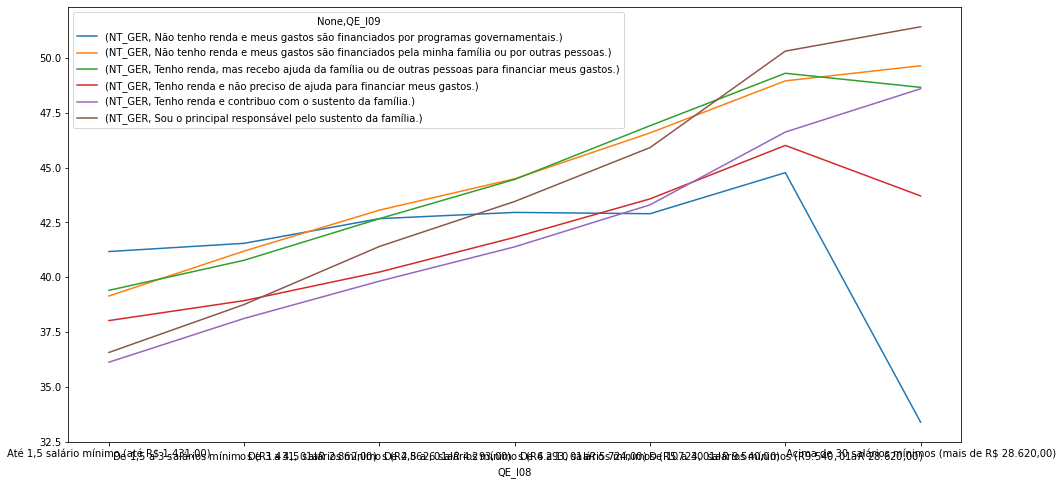

In [80]:
relacao.groupby(['QE_I08', 'QE_I09']).mean().unstack().plot()